## 차량 속도 측정 예제(이동평균 필터)
차량 초기속도 : 50m/s
속도 변화 : 평균 0, 표준편차 10, 매 0.1초마다 갱신
잡음 : 평균 0, 표준편차 2
$$\bar x_k = \bar x_{k-1} + {x_k - x_{k-n} \over n}$$

In [102]:
# 이동평균 필터 구현
from collections import deque

def mov_avg_filter(dataList):
    n = 10
    xbuf = deque([dataList[0]]*n)
    movAvgList = []
    prevMovAvg = xbuf[-1]
    
    for data in dataList:
        avg = prevMovAvg + (data - xbuf.popleft())/n
        xbuf.append(data)
        movAvgList.append(avg)
        prevMovAvg = avg
        
    return movAvgList

In [112]:
import numpy as np

np.random.seed(2023)

# 속도 데이터 생성
def make_velo_data(Nsamples):
    measVeloData = []
    velo = 50
    dv = np.random.normal(0, 10, Nsamples)
    noise = np.random.normal(0, 2, Nsamples)
    for i in range(Nsamples):
        velo = velo + dv[i]
        measVeloData.append(velo + noise[i])
    return measVeloData

measVeloData = make_velo_data(500)

In [113]:
movAvgFilterData = mov_avg_filter(measVeloData)

Text(0, 0.5, 'Velo(m/s)')

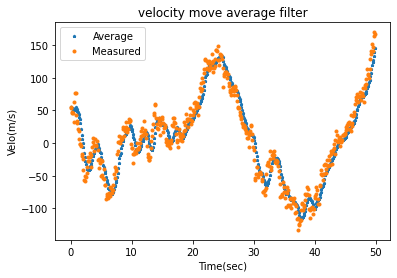

In [114]:
# 데이터 시각화
import matplotlib.pyplot as plt

x_data = [i*0.1 for i in range(500)]
plt.plot(x_data, movAvgFilterData, '*', label='Average', markersize=3)
plt.plot(x_data, measVeloData, 'o', label = 'Measured', markersize=3)
plt.legend()
plt.title('velocity move average filter')
plt.xlabel('Time(sec)')
plt.ylabel('Velo(m/s)')